# $\color{blue}{\text{TP 4 IIA : Expansion polynomiale et données non linéairement séparables}}$

## <font color="#1abc9c">Introduction</font>


Dans les TPs précédents, vous avez vu des méthodes linéaires : Régression linéaire, et régression logistique. La méthode de régression linéaire apprend un hyperplan (un modèle linéaire) pour faire une prédiction. La régression logistique apprend également un hyperplan. Il est peu probable que, dans une situation réelle, la vraie fonction que nous souhaitons apprendre soit linéaire. Bien que les modèles linéaires soient très importants et utiles, dans certains cas, nous souhaitons aller au-delà de la linéarité. 

L'expansion de base (basis expansion) est une technique populaire pour atteindre cet objectif. Cette méthode crée des attributs (*features*) non-linéaires à partir des attributs existants. Nous pouvons alors utiliser les techniques d'apprentissage linéaire dans l'espace des nouveaux attributs. De cette façon, le modèle résultant sera non linéaire dans l'espace d'origine des attributs. 



**Objectifs du TP :**
Mise en oeuvre de la technique d'expansion polynomiale, pour un problème de regression et un problème de classification. Nous souhaitons comparer les modèles linéaires avec et sans l'expansion polynomiale. Si l'expansion de base peut améliorer les modèles, elle peut aussi conduire à sur-apprentissage (overfitting). Nous vous demanderons de délibérément construire des modèles qui souffrent d'un problème de sur-aprentissage, afin d'observer les problèmes associés et de les éviter dans vos futurs projets. 




In [1]:
# importation des librairies nécéssaires
# pour calcul numerique, chargement des données, visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tpiia_utils

# fonctions de scikit-learn
from sklearn.preprocessing import PolynomialFeatures  # polynomial regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


# <font color="#1abc9c">1. Régression linéaire et expansion polynomiale</font>

### 1.1  Chargement et analyse des données

Nous allons travailler avec le Boston housing dataset. Pour la description de ce jeu de données, voir le TP2. 

Notre but (dans un premier temps) est de prédire MEDV (Valeur médiane des maisons occupées par leur propriétaire, en milliers de $) à partir de LSTAT (le pourcentage de la population dont le revenu est dans le premier Quartile des salaires dans cette région).

In [2]:
# Load Boston housing data set
boston_df = pd.read_csv("./data/boston.csv")

# View the features
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


<font color="red">**Question 1:**</font> Observez visuellement les données. Quels problèmes anticipez-vous, si on utilise un modèle linéaire pour la regression? (Rappelez le terme technique pour ce problème.)

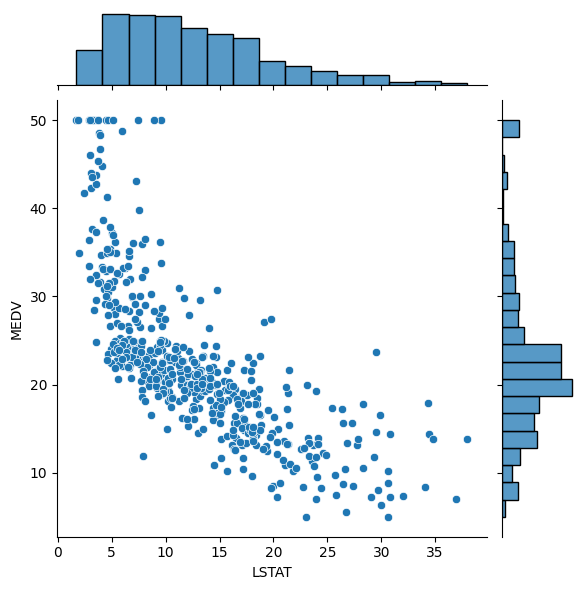

In [3]:
# Visualisation de valeurs LSTAT et MEDV. 
sns.jointplot(data=boston_df, x="LSTAT", y="MEDV");

### 1.2  Performance de la régression linéaire

Nous allons maintenant procéder à l'apprentissage et l'évaluation d'un modèle de regression lineaire (cf. TP2). 

<font color="red">**Question 2:**</font> Rappelez l'équation et le nombre de paramètres du modèle.


In [4]:
# Define the X (input) and y (target) features
X = boston_df[["LSTAT"]]
y = boston_df["MEDV"]

# Split into train (2/3) and test (1/3) sets
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=9)

# apprentissage du modèle
lreg_model=LinearRegression()
lreg_model.fit(X_train, y_train)
print("Estimated coefficients :",lreg_model.coef_)
print("Independent term in the linear model :",lreg_model.intercept_)

Estimated coefficients : [-0.93278842]
Independent term in the linear model : 34.23944643017366


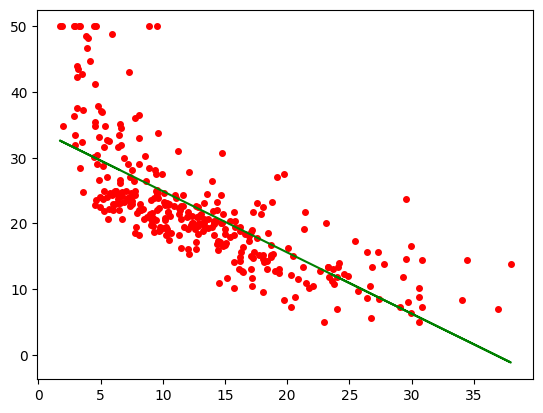

In [5]:
# Visualisation du modèle appris
plt.plot(X_train, y_train, 'ro', markersize=4)
plt.plot(X_train, lreg_model.predict(X_train),color='g')

<font color="red">**Question 3:**</font> Quelle est l'erreur empirique et l'erreur réelle ?

In [6]:
y_pred=lreg_model.predict(X_test)

print("Erreur réelle : ")
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

# TODO : calcul de l'erreur empirique

y_pred_train=lreg_model.predict(X_train)

print("Erreur empirique : ")
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred_train))
print("Coefficient of determination: %.2f" % r2_score(y_train,y_pred_train))


Erreur réelle : 
Mean squared error: 37.61
Coefficient of determination: 0.55
Erreur empirique : 
Mean squared error: 38.95
Coefficient of determination: 0.54


### 1.3 Transformation des données

La fonction <code>PolynomialFeatures(degree=n)</code> permet de générer une nouvelle matrices des attributs $X'$ consistant en toutes les combinaisons polynomiales des attributs d'entrée $X$, avec un degré inférieur ou égal au paramètre $n$ spécifié. 

<font color="red">**Question 4:**</font>  Regarder le résultat produit. Combien observez-vous d'attributs après la transformation ? A quoi correspondent-ils? Y a-t-il un attribut qui ne semble pas très utile pour réaliser l'apprentissage? 



In [7]:
X_poly2= PolynomialFeatures(degree=2).fit_transform(X)

print("Size ", np.shape(X_poly2))
# affichage des 10 premieres lignes
print(X_poly2[0:10,:])

Size  (506, 3)
[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]
 [  1.       5.21    27.1441]
 [  1.      12.43   154.5049]
 [  1.      19.15   366.7225]
 [  1.      29.93   895.8049]
 [  1.      17.1    292.41  ]]


Pour obtenir une expansion sans le biais, vous pouvez utiliser le paramètre 'include_bias=False'. 

In [8]:
X_poly2= PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

print("Size ", np.shape(X_poly2))
# affichage des 10 premieres lignes
print(X_poly2[0:10,:])

Size  (506, 2)
[[  4.98    24.8004]
 [  9.14    83.5396]
 [  4.03    16.2409]
 [  2.94     8.6436]
 [  5.33    28.4089]
 [  5.21    27.1441]
 [ 12.43   154.5049]
 [ 19.15   366.7225]
 [ 29.93   895.8049]
 [ 17.1    292.41  ]]


On peut à présent apprendre et évaluer un modèle de régression linéaire sur les données transformées.

<font color="red">**Question 5:**</font> Donnez l'équation du modèle dans ce cas, en fonction de l'attribut original du jeu de données. Combien de coefficients (paramètres) doivent être estimés ?


In [9]:
# Split into train (2/3) and test (1/3) sets
X_train_p2, X_test_p2, y_train, y_test = train_test_split(X_poly2, y, test_size=0.33, random_state=9)

# apprentissage du modèle
lreg_model_poly=LinearRegression()
lreg_model_poly.fit(X_train_p2, y_train)
print("Estimated coefficients :",lreg_model_poly.coef_)
print("Independent term in the linear model :",lreg_model_poly.intercept_)


Estimated coefficients : [-2.27635999  0.04145136]
Independent term in the linear model : 42.48020762245774


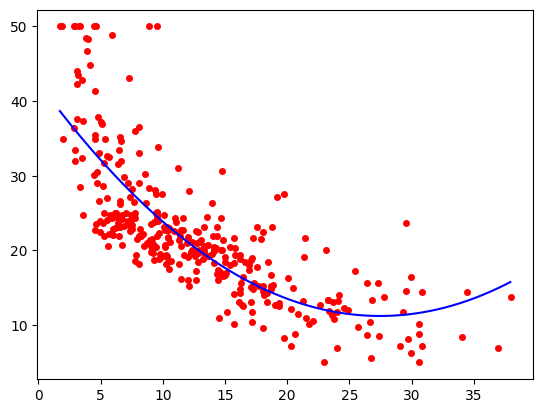

In [10]:
# visualisation du modèle appris
tpiia_utils.plot_regression_model_pf(lreg_model_poly, PolynomialFeatures(degree=2,include_bias=False), X_train, y_train)

<font color="red">**Question 6:**</font>
Visualisation et évaluation du modèle : comparez les résultats obtenus avec les résultats de la régression linéaire sans expansion de base. 

In [11]:
# TODO : calcul erreur réelle et empirique
y_pred_p2=lreg_model_poly.predict(X_test_p2)

print("Erreur réelle : ")
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_p2))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred_p2))

# TODO : calcul de l'erreur empirique

y_pred_train_p2=lreg_model_poly.predict(X_train_p2)

print("Erreur empirique : ")
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_pred_train_p2))
print("Coefficient of determination: %.2f" % r2_score(y_train,y_pred_train_p2))


Erreur réelle : 
Mean squared error: 28.64
Coefficient of determination: 0.66
Erreur empirique : 
Mean squared error: 31.22
Coefficient of determination: 0.63


In [12]:
def genModel(deg,X,y,show=False):

    X_tri, X_tei, y_tri, y_tei = train_test_split(X, y, test_size=0.33, random_state=9)

    polf = PolynomialFeatures(degree=deg,include_bias=False)
    
    X_pol = polf.fit_transform(X)

    X_tr, X_te, y_tr, y_te = train_test_split(X_pol, y, test_size=0.33, random_state=9)
    
    lregmod=LinearRegression()
    lregmod.fit(X_tr, y_tri)

    #print(X_tr[0])
    
    #print(y_tr)
    
    if show:
        tpiia_utils.plot_regression_model_pf(lregmod, polf , X_tri, y_tri)

    y_pred_te=lregmod.predict(X_te)
    y_pred_tr=lregmod.predict(X_tr)

    return mean_squared_error(y_te,y_pred_te),mean_squared_error(y_tr,y_pred_tr)

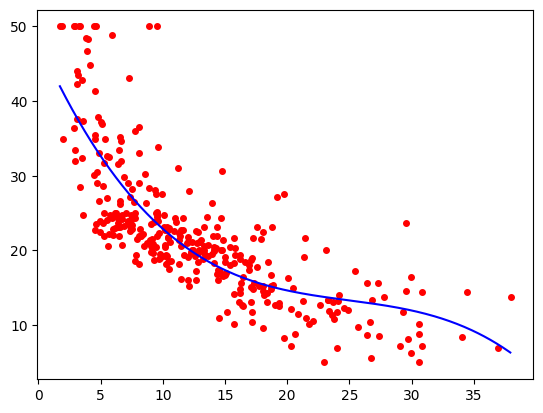

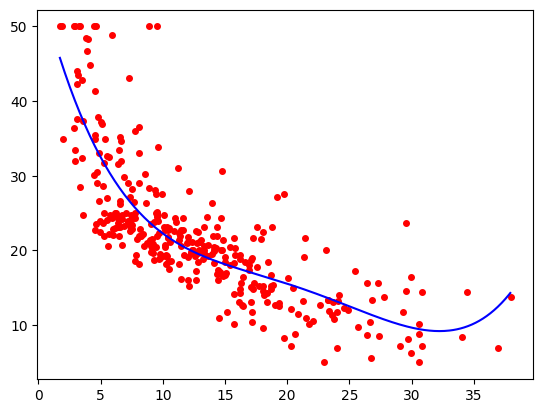

(25.671247206170204, 28.627257328459255)

In [13]:
genModel(3,X,y,True)
genModel(4,X,y,True)

Nous avons fait au dessus une expansion polynomiale de degré 2. Nous proposons que vous experimentiez avec des degrés plus grands. 

<font color="red">**Question 7:**</font> Donnez l'équation du modèle en fonction de l'attribut original du jeu de données, et le nombre de paramètres à apprendre pour une expansion polynomiale de degré 3.

Le degré du polynôme est un **hyper-paramètre** : la valeur est fixée par l'utilisateur et influe sur le modèle produit.

<font color="red">**Question 8:**</font> Analysez la qualité des modèles, pour une expansion polynomiale de degrés variant de 2 à 7. Visualisez le modèle pour le degré 7. 
- (a) Pour chaque degré, reportez les erreurs (MSE) empiriques et réelles dans un tableau
- (b) Tracez sur une même courbe les erreurs empiriques et les erreurs réelles (en ordonnées) en fonction du degré du polynome (en abscisse)
- (c) Qu'observez-vous ? A partir de quelle valeur de degré observez-vous du surapprentissage? Sur la base de votre analyse, quel degré d'expansion proposeriez-vous d'utiliser ?

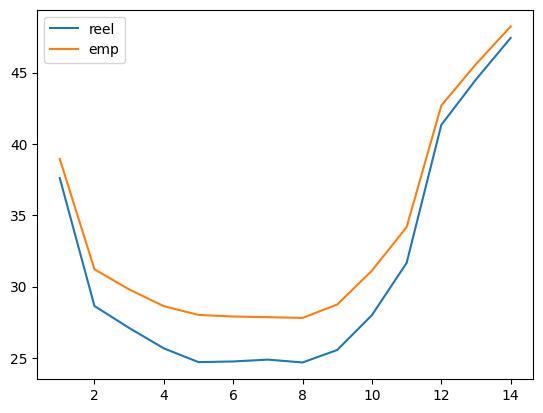

In [14]:
#A COMPLETER
MSE_e=[]
MSE_r=[]
t=[]
for i in range(1,15):
    t.append(i)
    r,e = genModel(i,X,y)
    MSE_e.append(e)
    MSE_r.append(r)

plt.plot(t,MSE_r,label="reel")
plt.plot(t,MSE_e,label="emp")
plt.legend()

### 1.4 Multivariate linear regression


Dans la première partie, le but était de prédire MEDV à partir de LSTAT. Nous proposons maintenant de prédire MEDV à partir de LSTAT et RM.


In [15]:
# Define the X (input) and y (target) features
X = boston_df[["LSTAT", "RM"]]
y = boston_df["MEDV"]

Nous entrainons d'abord un modèle de régression linéaire sur ces données.

In [16]:
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=9)


# apprentissage du modèle
lreg_model=LinearRegression()
lreg_model.fit(X_train, y_train)
print("Estimated coefficients :",lreg_model.coef_)
print("Independent term in the linear model :",lreg_model.intercept_)

#evaluation
y_pred=lreg_model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Estimated coefficients : [-0.63141636  5.05625172]
Independent term in the linear model : -1.2883216369272894
Mean squared error: 28.51
Coefficient of determination: 0.66


<font color="red">**Question 9:**</font> Transformez les données avec une expansion polynomiale. Si on utilise une expansion de degré 2, combien obtient-on d'attributs ? A quoi correspondent-ils (en fonction des attributs initiaux du jeu de données) ?

In [17]:
#A COMPLETER
X_poly= PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)
print(X_poly[0])
np.shape(X_poly)

[ 4.98      6.575    24.8004   32.7435   43.230625]


(506, 5)

<font color="red">**Question 10:**</font> Entrainez un modèle de régression linéaire sur les données transformées et évaluez-le. Comparez les résultats avec le modèle sans expansion.

In [18]:
#A COMPLETER

genModel(2,X,y,False)

(16.38001381175005, 22.758597428755827)

# <font color="#1abc9c">2. Régression logistique</font>

Nous allons réaliser la même étude dans le cas d'une tâche de classification (cf. TP3).

### 2.1  Chargement et analyse des données

Attention de ne pas confondre le nom des variables dans le fichier (arbitraires) et les notations théoriques ($\boldsymbol{x}, y$).

<font color="red">**Question 1:**</font>
- Combien y a-t-il d'exemples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(m)}$ dans le jeu de données ?
- Quelle est la variable cible $y$ ?
- Quelles sont les classes ?
- Combien y a-t-il d'attributs $x_1, x_2,...x_d$ ?
- Quelle est la répartition des exemples par classe ?



In [19]:
# Load data set
nl_df = pd.read_csv("./data/classif_nonlinear.csv")

print("Résumé des données")
nl_df.info()

# View the features
nl_df.head()

print(nl_df.groupby('Z')["X"].count())

Résumé des données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   Y       500 non-null    float64
 2   Z       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
Z
0    250
1    250
Name: X, dtype: int64


<Axes: xlabel='X', ylabel='Y'>

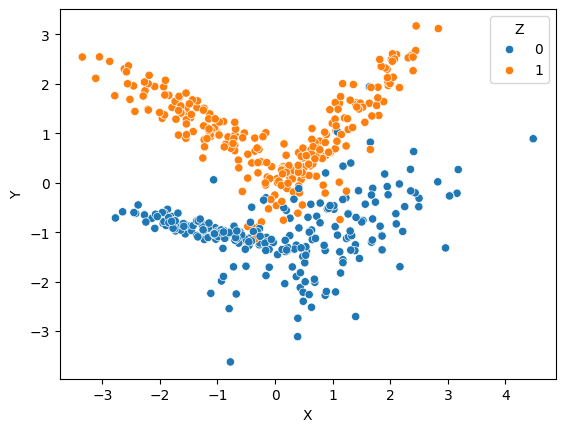

In [20]:
%matplotlib inline
import seaborn as sns

sns.scatterplot(x=nl_df.iloc[:, 0],y=nl_df.iloc[:, 1],hue=nl_df.iloc[:, 2])

### 2.2  Performance de la régression logistique

Comme au TP3, nous allons apprendre et évaluer un modèle de régression logistique (cf. TP3) sur les données d'origine.

<font color="red">**Question 2:**</font> Rappelez l'équation du modèle de régression logistique, exprimée en fonction des attributs initiaux du jeu de données, et le nombre de paramètres à apprendre dans ce cas.

In [21]:
# Define the X (input) and y (target) features
X = nl_df.drop('Z', axis=1)
y = nl_df['Z']

# conversion numpy array
X = X.to_numpy()
y = y.to_numpy()


In [22]:
# Apprentissage du modèle
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Estimated coefficients :",logreg.coef_)
print("Bias :",logreg.intercept_)

Estimated coefficients : [[-0.20435508  3.81088468]]
Bias : [0.69597771]


Accuracy: 0.8909090909090909


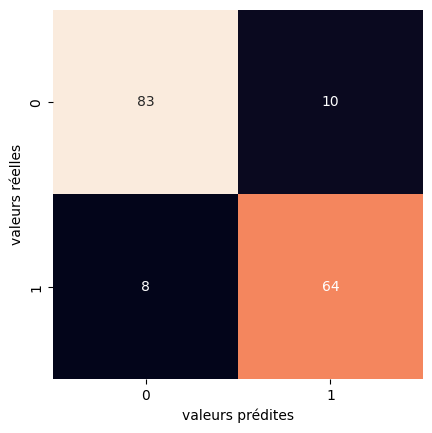

In [23]:
# Evaluation du modele
y_pred=logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

conf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, square=True, annot=True, cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

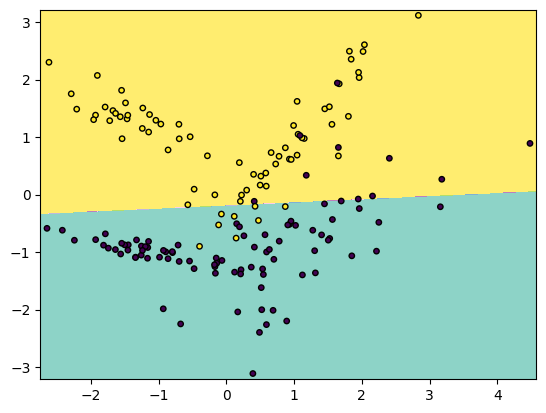

In [24]:
# visualisation de la frontiere de décision
tpiia_utils.plot_boundary(logreg, X_test, y_test)

<font color="red">**Question 3:**</font> Qu'observez-vous visuellement et quantitativement ? Quel est le problème ?

### 2.3 Transformation des données

De la même façon que pour la régression linéaire, nous allons transformer les données avec une expansion polynomiale.

<font color="red">**Question 4:**</font> Combien y a-t-il d'attributs après une transformation polynomiale de degré 2 ? A quoi correspondent-ils ? (toujours en fonction des attributs du jeu de données)


In [25]:
X_p2= PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

print("Size ", np.shape(X_p2))
# affichage des 10 premieres lignes
print(X_p2[0:10,:])

Size  (500, 5)
[[-2.41950981e+00 -6.20728743e-01  5.85402774e+00  1.50185929e+00
   3.85304173e-01]
 [-2.65780727e-01 -1.07850902e+00  7.06393948e-02  2.86646911e-01
   1.16318170e+00]
 [ 2.59579744e-01  9.31928679e-02  6.73816433e-02  2.41909808e-02
   8.68491064e-03]
 [ 2.15804165e+00 -2.55163757e-02  4.65714375e+00 -5.50654015e-02
   6.51085429e-04]
 [-1.54641866e+00  1.49815903e+00  2.39141068e+00 -2.31678108e+00
   2.24448047e+00]
 [ 1.94536088e+00  2.29493817e+00  3.78442894e+00  4.46448293e+00
   5.26674120e+00]
 [ 1.74282614e+00 -3.92501909e-01  3.03744295e+00 -6.84062586e-01
   1.54057748e-01]
 [ 7.75249953e-01  8.41623418e-01  6.01012490e-01  6.52468515e-01
   7.08329977e-01]
 [ 1.96470067e+00  1.96627473e+00  3.86004871e+00  3.86314126e+00
   3.86623630e+00]
 [-1.13235658e+00  1.39169806e+00  1.28223141e+00 -1.57589845e+00
   1.93682350e+00]]


In [26]:
# apprentissage d'un modèle de regression logistique
Xp2_train, Xp2_test, y_train, y_test = train_test_split(X_p2, y, test_size=0.33, random_state=5)

logreg_poly = LogisticRegression()
logreg_poly.fit(Xp2_train,y_train)
print("Estimated coefficients :",logreg_poly.coef_)
print("Bias :",logreg_poly.intercept_)

Estimated coefficients : [[-0.04420962  3.84109215 -1.12325409 -0.41144423  0.25952219]]
Bias : [1.85688563]


Accuracy: 0.9454545454545454


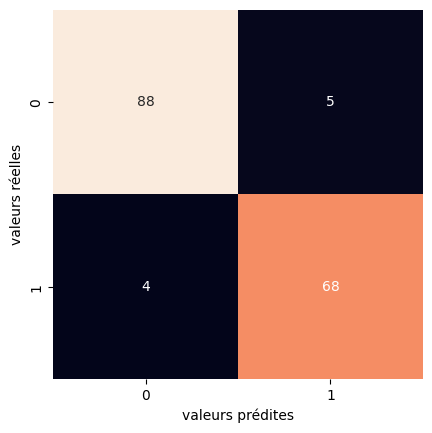

In [27]:
# Evaluation du modele
y_pred_p2=logreg_poly.predict(Xp2_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_p2))

conf = metrics.confusion_matrix(y_test, y_pred_p2)
sns.heatmap(conf, square=True, annot=True, cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

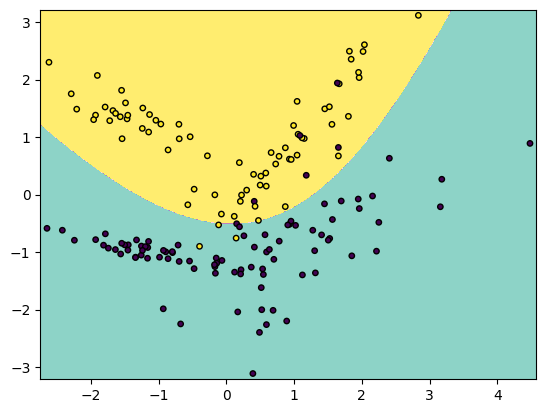

In [28]:
# visualisation de la frontiere de decision
tpiia_utils.plot_boundary_pf(logreg_poly, PolynomialFeatures(degree=2,include_bias=False), X_test, y_test)

<font color="red">**Question 5:**</font> Visuellement et quantitativement : quelles différences constatez-vous avec le modèle appris sur les données d'origine ?

<font color="red">**Question 6:**</font> Testez avec une transformation polynomiale de degré 3, 5 et 9, et visualisez dans chaque cas la frontière de décision du modèle.
- (a) Reportez les erreurs empiriques et réelles dans un tableau pour chaque degré testé ($\{1,2,3,5,9\}$).
- (b) Tracez sur un même graphe la courbe de l'erreur empirique et de l'erreur réelle (en ordonnée) en fonction du degré du polynôme (en abscisse).
- (c) A partir de quel degré commence-t-on à avoir du sur-apprentissage? 



In [29]:
for i in [1,3,5,9]:
    print( genModel(i,X,y,False) )

(0.10177838385708388, 0.08304766196702855)
(0.06095593345281758, 0.04477832326773259)
(0.06892283295141138, 0.03394204331030571)
(1.8582847383970271, 0.028124419894008826)


# <font color="#1abc9c">3. Sélection de modèle</font>

Comme vous venez de le voir, pour chaque valeur du degré $n$ du polynome, on obtient un modèle (de régression linéaire ou de régression logistique) différent. Plus la valeur de $n$ est grande, plus le modèle est complexe : le nombre de paramètres du modèle augmente, et vous avez pu voir que les frontières de décision par exemple deviennent plus complexes.

Plus un modèle est complexe, plus le risque de sur-apprentissage est grand.

Le degré du polynôme est un **hyper-paramètre** du modèle, il est fixé par l'utilisateur. Alors, **comment choisir la meilleure valeur de $n$ ?**

On utilise une partie de l'ensemble d'apprentissage que l'on appelle l'**ensemble de validation**. Il y a donc en réalité 3 ensembles *disjoints* :
- l'ensemble d'apprentissage : pour entraîner (construire) le modèle
- l'ensemble de validation : pour sélectionner les hyper-paramètres correspondant au meilleur modèle
- l'ensemble de test : pour évaluer le modèle final

L'ensemble de validation agit comme "contrôleur" dans le processus d'apprentissage. **La meilleure valeur de l'hyper-paramètre correspond au modèle ayant les meilleures performances lorsqu'il est évalué sur l'ensemble de validation (ce sera le modèle final retenu)**. L'ensemble de validation joue en quelque sorte le rôle d'ensemble de test, dans le sens où il permet d'estimer l'erreur réelle.

MAIS, la véritable évaluation du modèle final se fait sur l'ensemble de test ! Il serait biaisé de considérer les performances sur l'ensemble de validation, puisque celui-ci a justement servi à sélectionner le modèle durant la phase d'apprentissage...

On appelle <font color="blue">sélection de modèles</font> le processus de choix des hyper-paramètres. 

En pratique, plutôt que de séparer l'ensemble des données labelisées dont on dispose en 3 ensembles, on utilise la **validation croisée** sur l'ensemble d'apprentissage pour la sélection de modèles.



### 3.1  Mise en oeuvre avec scikit-learn

En pratique, pour sélectionner le meilleur hyperparamètre, il faut :
1. déterminer les valeurs des hyperparamètres que l'on souhaite tester
2. évaluer par validation croisée chaque valeur de l'hyperparamètre (1 valeur = 1 modèle = 1 evaluation). La métrique d'évaluation utilisée (accuracy, MSE...) dépend de la tâche.

3. retenir la valeur de l'hyperparamètre pour laquelle la métrique est la meilleure
4. apprendre (sur l'ensemble d'apprentissage) le modèle avec la valeur optimale de l'hyperparamètre et l'évaluer sur l'ensemble de test.


Les étapes 2 et 3 s'implémentent par des boucles 'for'. Cette procédure est implémentée dans scikit-learn par la fonction <code>GridSearchCV(estimator, param_grid, cv,...)</code> : 
- 'estimator' est le modèle à tester, 
- 'param_grid' contient les valeurs des hyper-paramètres à tester, 
- 'cv' est le nombre de plis pour la validation croisée

Par ailleurs, dans un processus d'apprentissage, le jeu de données utilisés peut/doit subir plusieurs transformations : normalisation des données, encodage de variable catégorielles, transformation polynomiale...

La classe <code> Pipeline </code> permet de créer un pipeline de transformations avec un modèle (classificateur, régresseur). Le but du pipeline est d'assembler plusieurs étapes, toutes les opérations de transformations vont être centralisées dans le pipeline.

L'utilisation des 'Pipeline' permet également d'utiliser la recherche des meilleurs hyperparamètres ('GridSearchCV') lorsque ceux-ci concernent la transformation de données et non le modèle en lui-même : c'est le cas par exemple de la recherche du meilleur degré du polynôme lors d'une transformation polynomiale des données.

Le code ci-dessous montre un exemple d'utilisation de ces fonctions appliquées à la tache de classification et au jeu de données de la section précédente.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [31]:
#hyperparametres à explorer : nom et valeurs
hyperparams = [{'polynomialfeatures__degree': [1,2,3,5,9]}]

# création d'un pipeline (stocké dans la variable 'estimator') qui combine une expansion polynomiale et la regression logistique
estimator = make_pipeline(PolynomialFeatures(include_bias=False), LogisticRegression())

# GridSearchCV va evaluer l'accuracy des modèles, pour les différentes valeurs des hyperparametres,
# avec une validation croisé (ici, 3 plis)
clf = GridSearchCV(estimator, hyperparams, cv = 3, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)

print(np.size(X_train))
print(np.size(X_test))

670
330


<font color="red">**Question 1 :**</font> Combien de modèles différents sont testés ? Combien d'apprentissages sont réalisés ?


<font color="red">**Question 2 :**</font> Sur combien de données les apprentissages sont-il réalisés dans la validation croisée ? Quelle est la taille de l'ensemble de validation ?


On affiche ci-dessous toutes les informations enregistrées lors de la recherche.

In [32]:
# Affichage du détails des informations
cv_results_df=pd.DataFrame.from_dict(clf.cv_results_)
print(cv_results_df)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002661      0.000316         0.001030        0.000247   
1       0.003254      0.000120         0.001042        0.000195   
2       0.003161      0.000281         0.000788        0.000018   
3       0.003870      0.000238         0.000885        0.000022   
4       0.010056      0.000507         0.000961        0.000102   

   param_polynomialfeatures__degree                             params  \
0                                 1  {'polynomialfeatures__degree': 1}   
1                                 2  {'polynomialfeatures__degree': 2}   
2                                 3  {'polynomialfeatures__degree': 3}   
3                                 5  {'polynomialfeatures__degree': 5}   
4                                 9  {'polynomialfeatures__degree': 9}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.937500           0.937500           0.981982         0.9523

<font color="red">**Question 3:**</font> Que contiennent les colonnes 'split0_test_score', 'split1_test_score', 'split2_test_score' et 'mean_test_score' ?

<font color="red">**Question 4:**</font> Quelle valeur du degré du polynôme produit la meilleur accuracy (estimée par validation croisée) ?

Vous pouvez retrouver directement ces résultats les variables 'best_params_' et 'best_score_'.

In [33]:
#afficher le meilleur param et meilleur accuracy
print(clf.best_params_)
print(clf.best_score_)

{'polynomialfeatures__degree': 2}
0.9612558987558989


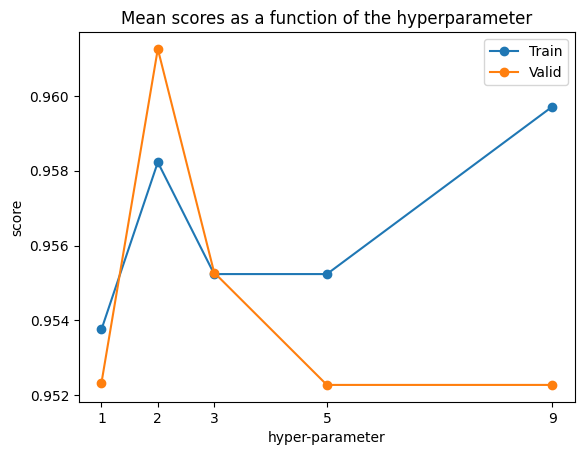

In [34]:
# visualisation des résultats
tpiia_utils.plotMeanScores(hyperparams[0]['polynomialfeatures__degree'],cv_results_df )

### 3.2  Sélection du meilleur modèle pour la régression linéaire

L'objectif de cet exercice est de prédire la distance d'arrêt d'un véhicule en fonction de sa vitesse, dans une approche "basée données". On charge les données (les observations) du fichier 'freinage.txt'. 

       Vitesse   Distance
0    97.392106  68.402652
1   102.370015  73.182796
2    74.224307  41.771213
3    57.860100  26.790577
4    66.642638  39.213546
5   103.991954  70.044527
6    48.622550  24.229955
7    97.161667  71.738251
8    65.465271  34.018463
9    98.308747  55.464594
10   28.022476  10.185832
11   70.666910  34.943853
12  104.561636  58.636005
13   21.740255   6.663605
14   54.976694  22.917317
15   15.064509   5.650872
16   71.649885  50.572225
17   98.554082  73.797085
18   57.266689  16.732973
19   92.492421  49.985846


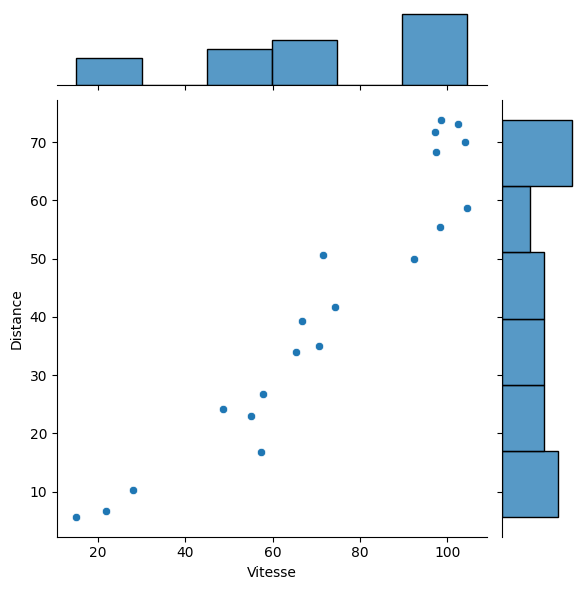

In [35]:
frein_df = pd.read_csv("./data/freinage.txt", sep=' ')
print(frein_df)

# Affichage des données
sns.jointplot(data=frein_df,x="Vitesse", y="Distance");


<font color="red">**TASK:**</font>
- Ecrire le code pour sélectionner la meilleure valeur du degré du polynôme. 
- Une fois le meilleur hyper-paramètre trouvé, apprendre le modèle final puis l'évaluer sur l'ensemble de test.
- Vous pouvez également visualiser le modèle (voir partie 1 du TP)

Aide: La métrique d'évaluation de la GridSearch dans le cas d'une régression linéaire est: 'neg_mean_squared_error'
        
<font color="red">**Question 5:**</font> Quelle est la performance du modèle final ?
Vous indiquerez à quel degré cela correspond, ainsi que les différents degrés que vous avez testés.

In [36]:
# Define the X (input) and y (target) features
X = frein_df[["Vitesse"]]
y = frein_df["Distance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [37]:
### TO COMPLETE

hyperparams = [{'polynomialfeatures__degree': list(range(1,10))}]
estimator = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

clf = GridSearchCV(estimator, hyperparams, cv = 3, scoring='r2', return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid=[{'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9]}],
             return_train_score=True, scoring='r2')

In [38]:
#afficher le meilleur param et meilleur accuracy
print(clf.best_params_)
print(clf.best_score_)

coef = clf.best_params_['polynomialfeatures__degree']

{'polynomialfeatures__degree': 1}
0.7585802219879354


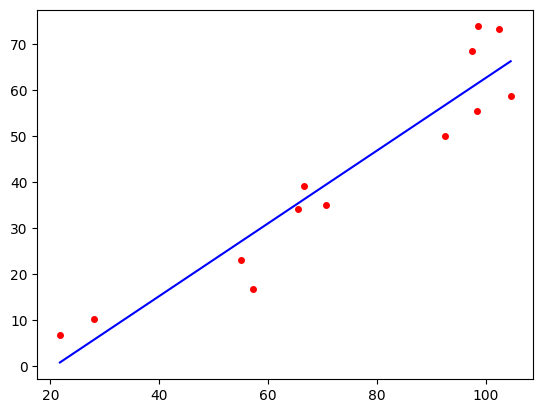

(52.80362344509083, 51.852133998734224)

In [39]:
genModel(coef,X,y,True)